In [1]:
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sb
import statsmodels.api as sm

In [2]:
# Loading data
data = pd.read_excel('ЛР1 ПАД.xlsx')
X = data.drop(data.columns[[0, 1]], axis=1)
Y = data['Y']
X

,х1,х2,х3,х4,х5,х6,x7,x8,x9
0,9.2,15.9,7.8,5.3,16.7,169,148,22.7,2094
1,7.6,16.4,6.7,4.7,15.5,144,150,27.9,1768
2,7.3,18.3,6.3,4.9,19.6,138,133,33.7,1982
3,7.9,16.4,6.8,5.0,17.6,197,155,26.6,1621
4,7.9,17.0,6.3,4.4,20.1,182,159,30.5,1631
5,8.0,16.9,8.2,4.6,15.5,520,197,19.1,1066
6,7.2,17.6,8.1,5.2,16.1,143,165,31.2,1183
7,8.7,16.0,7.6,4.4,18.9,214,161,22.7,1308
8,7.8,17.9,7.2,4.3,15.7,158,163,24.4,1475
9,8.0,16.9,6.9,4.7,16.8,185,146,19.8,2081


### 1. Нормирование исходных данных

In [3]:
# l2 data normalization
# X_preprocessed = pd.DataFrame(preprocessing.normalize(X, norm='l2'))

# Z data normalization
X_preprocessed = X
for col in X.columns:
    X_preprocessed[col] = (X_preprocessed[col] - X_preprocessed[col].mean()) / X_preprocessed[col].std()
    
# matrix X with a free member
X_preprocessed.insert(0, 'x0', 1)
X_preprocessed

,x0,х1,х2,х3,х4,х5,х6,x7,x8,x9
0,1,-0.298981,0.650702,1.099496,0.654731,-0.575552,0.117606,-0.244956,-0.818424,0.318781
1,1,-0.863044,0.842955,-0.755701,0.147842,-0.887581,-0.290094,-0.195489,-0.391941,-0.159447
2,1,-0.968806,1.573515,-1.430318,0.316805,0.178516,-0.387942,-0.615957,0.083751,0.154482
3,1,-0.757282,0.842955,-0.587047,0.401287,-0.341531,0.574230,-0.071822,-0.498562,-0.375089
4,1,-0.757282,1.073658,-1.430318,-0.105602,0.308528,0.329610,0.027112,-0.178700,-0.360420
5,1,-0.722028,1.035207,1.774113,0.063361,-0.887581,5.841715,0.966981,-1.113682,-1.189250
6,1,-1.004060,1.304361,1.605459,0.570250,-0.731567,-0.306402,0.175512,-0.121289,-1.017616
7,1,-0.475251,0.689152,0.762187,-0.105602,-0.003500,0.851466,0.076578,-0.818424,-0.834246
8,1,-0.792536,1.419713,0.087570,-0.190083,-0.835576,-0.061782,0.126045,-0.678997,-0.589265
9,1,-0.722028,1.035207,-0.418392,0.147842,-0.549550,0.378534,-0.294423,-1.056270,0.299710


### 2. Расчет весов линейной регрессии по аналитической формуле

In [8]:
# Matrix X transposition
X_transposed = np.transpose(X_preprocessed)
# Covariance matrix
covariance_matr = np.matmul(X_transposed, X_preprocessed)
# Inverse covariance matrix
covariance_matr_inv = np.linalg.inv(covariance_matr)
# Calculating the weight matrix
analytical_weights = np.matmul(np.matmul(covariance_matr_inv, X_transposed), Y)
pd.DataFrame(analytical_weights)

,0
0,58.498077
1,-2.760975
2,-2.183014
3,1.014947
4,-2.345928
5,-0.185930
6,-0.347731
7,-1.121743
8,-0.599550
9,-0.623584


### 3. Построение корреляционной матрицы. Расчет числа обусловленности

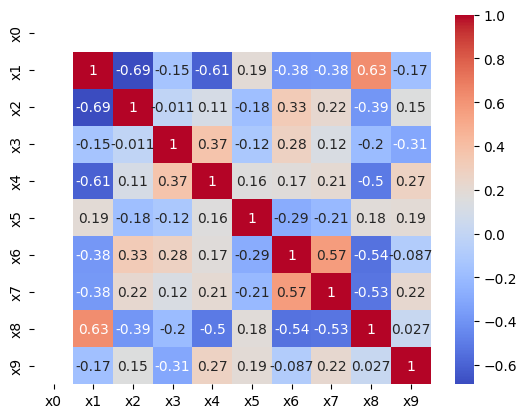

In [9]:
# Correlation matrix
df_plot = sb.heatmap(X_preprocessed.corr(), cmap="coolwarm", annot=True)

In [10]:
# Condition number of a matrix with l2 normalization
np.linalg.cond(X)

6.328391426899217

Число обусловленности равно 5311, что говорит о сильной мультиколлинеарности

### 4. Анализ регрессионных остатков

In [11]:
# Y predicted by the analytical method
Y_predicted = np.matmul(X_preprocessed.to_numpy(), analytical_weights.to_numpy())
MSE = mean_squared_error(Y, Y_predicted)
RMSE = MSE ** 0.5
R2 = r2_score(Y, Y_predicted)

print(f'RMSE: {RMSE}')
print(f'Коэффициент детерминации: {R2}')

RMSE: 1.9502921416622299
Коэффициент детерминации: 0.5816019054675963


### 5. Определение весов линейной регрессии градиентным методом

In [12]:
# Unit vector of weights for the first iteration
weights_i = [1] * len(X_preprocessed.columns)
# Number of rows
n = len(X)
convergence_step = 0.1
for i in range(1, 100):
    Y_predicted_i = np.matmul(X_preprocessed, weights_i)
    MSE = mean_squared_error(Y, Y_predicted_i)
    delta = Y - Y_predicted_i
    ds_dw = -2/n * (np.matmul(delta, X_preprocessed))
    weights_i = weights_i - convergence_step * ds_dw

Y_predicted_i = np.matmul(X_preprocessed, weights_i)
MSE = mean_squared_error(Y, Y_predicted_i)
RMSE = MSE ** 0.5
R2 = r2_score(Y, Y_predicted_i)

print(f'RMSE: {RMSE}')
print(f'Коэффициент детерминации: {R2}')

RMSE: 1.9756470306990306
Коэффициент детерминации: 0.5706523714548131


### 7. Fit-predict модели линейной регрессии c помощью библиотеки sklearn 

In [13]:
# Creating a model using sklearn
lin_reg = LinearRegression().fit(X, Y)
# Y predicted by the sklearn
Y_predict_sklearn = lin_reg.predict(X)
MSE = mean_squared_error(Y, Y_predict_sklearn)
RMSE = MSE ** 0.5
R2 = r2_score(Y, Y_predict_sklearn)

print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print(f'R2: {R2}')
print(f'\nОценочные коэффициенты:')
pd.DataFrame(lin_reg.coef_)

MSE: 3.803639437829443
RMSE: 1.9502921416622288
R2: 0.5816019054675967

Оценочные коэффициенты:


,0
0,0.000000
1,-2.760975
2,-2.183014
3,1.014947
4,-2.345928
5,-0.185930
6,-0.347731
7,-1.121743
8,-0.599550
9,-0.623584


### 8. «Эконометрический» результат обучения модели линейной регрессии с помощью библиотеки statmodels

In [14]:
# Creating a model using statmodels
results = sm.OLS(Y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     6.487
Date:                Sun, 01 Oct 2023   Prob (F-statistic):           9.90e-06
Time:                        23:42:48   Log-Likelihood:                -108.52
No. Observations:                  52   AIC:                             237.0
Df Residuals:                      42   BIC:                             256.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x0            58.4981      0.301    194.387      0.0